<a href="https://colab.research.google.com/github/Harshil1752/Self_DS_projects/blob/main/Gold_price_analysis_and_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('data.csv', index_col="date", parse_dates = True)

In [4]:
data.head()

,price
date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


In [5]:
data.tail()

,price
date,
2017-10-01,1280.677
2017-11-01,1283.189
2017-12-01,1265.674
2018-01-01,1332.809
2018-02-01,1333.775


<Axes: xlabel='date'>

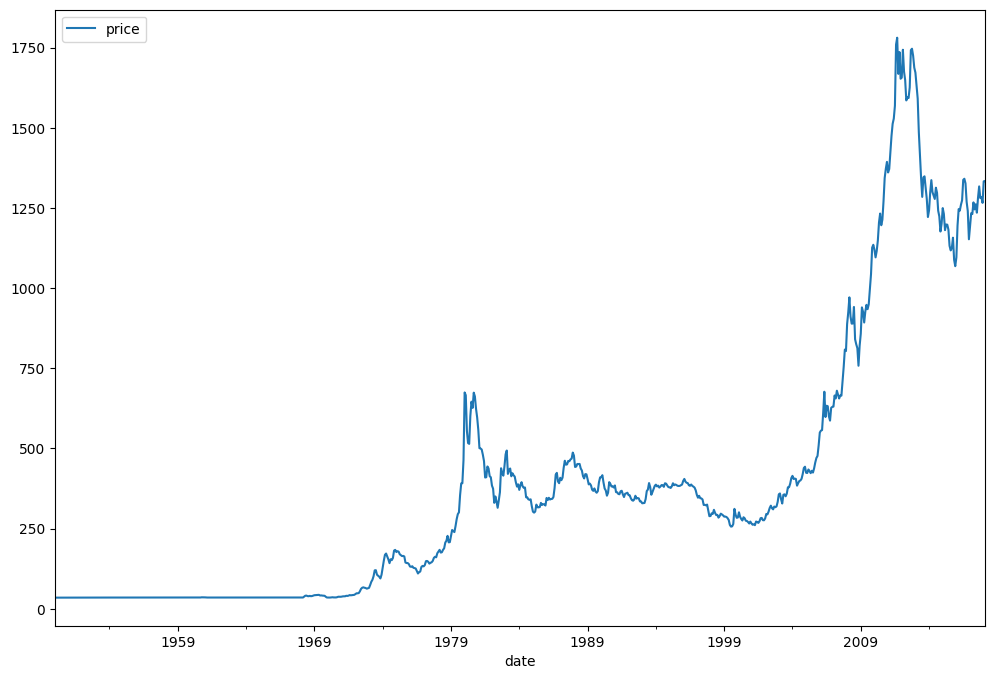

In [7]:
import matplotlib.pyplot as plt
data.plot(figsize = (12,8))

In [8]:
start_date = '2009-01-01'
end_date = '2018-01-01'
mask = (data.index >= start_date) & (data.index < end_date)
data = data.loc[mask]

<Axes: xlabel='date'>

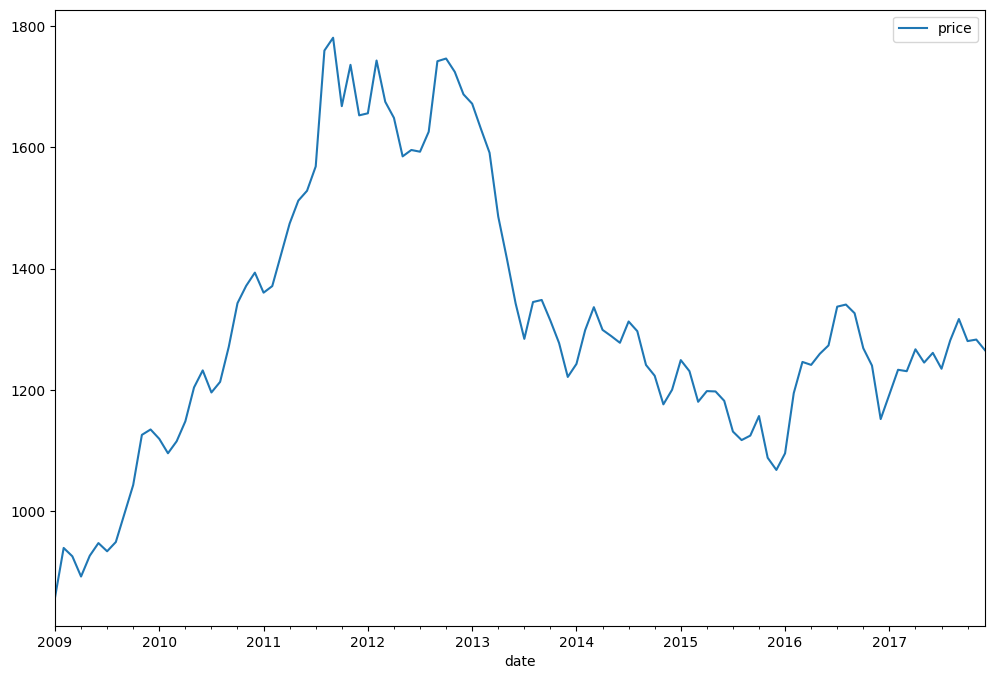

In [9]:
data.index.freq = "MS"
data.plot(figsize=(12, 8))

In [10]:
datayearly = data.rolling(window = 12).mean()

<Axes: title={'center': 'Yearly Avg Gold Prices'}, xlabel='date'>

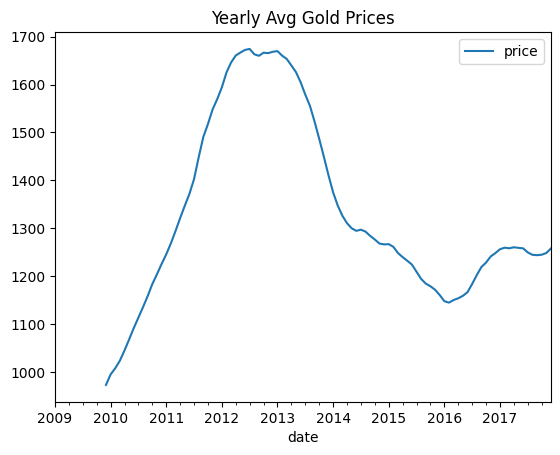

In [11]:
datayearly.plot(title = "Yearly Avg Gold Prices")

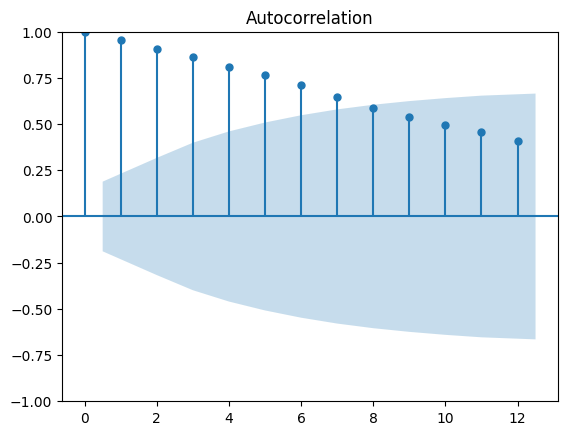

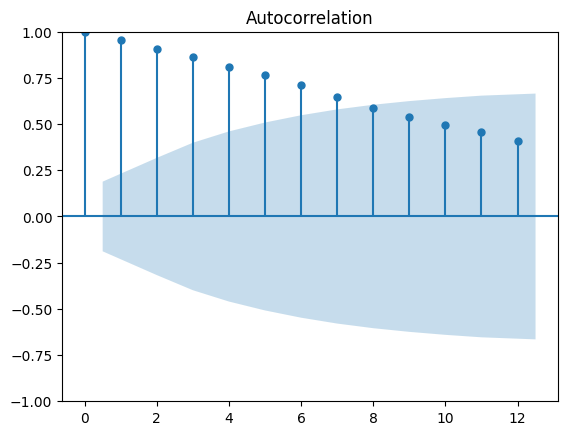

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data['price'], lags=12)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


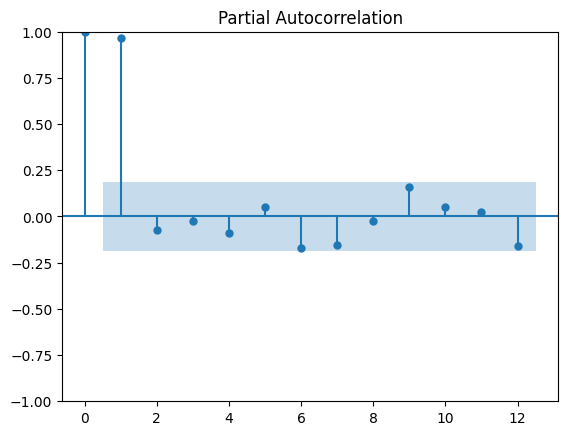

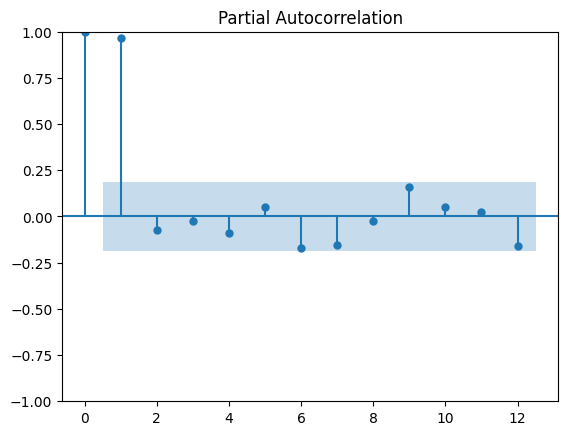

In [18]:
plot_pacf(data['price'], lags=12)

In [14]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
  result = adfuller(series, autolag='AIC')
  labels = ["ADF Test Statistic", "p value", "#lags used", "# observations"]
  out = pd.Series(result[0:4], index=labels)
  print(out.to_string())
  if result [1] <= 0.05:
    print("Reject the null hypothesis")
    print("Data has no unit root and stationary")
  else:
    print("Fail to reject the null hypothesis")
    print("Data has a unit root and non-stationary")

In [15]:
adf_test(data['price'])

ADF Test Statistic     -2.133761
p value                 0.231158
#lags used              5.000000
# observations        102.000000
Fail to reject the null hypothesis
Data has a unit root and non-stationary


In [19]:
from  pmdarima import auto_arima
arima_fit = auto_arima(data['price'], start_p = 0, start_q = 0, max_p = 10, max_q = 10, seasonal = False, trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1861.677, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1150.780, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1152.045, Time=0.39 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1148.396, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1152.930, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1149.835, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1473.891, Time=0.02 sec
 ARIMA(

In [20]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data['price'], order = (1,0,1))

In [21]:
modelresults = model.fit()

In [22]:
fcast = modelresults.predict(start = len(data),end = len(data) + 24, typ = ('levels'))
fcast = fcast.rename('ARIMA 1,0,1 Foreccast')

<Axes: xlabel='date'>

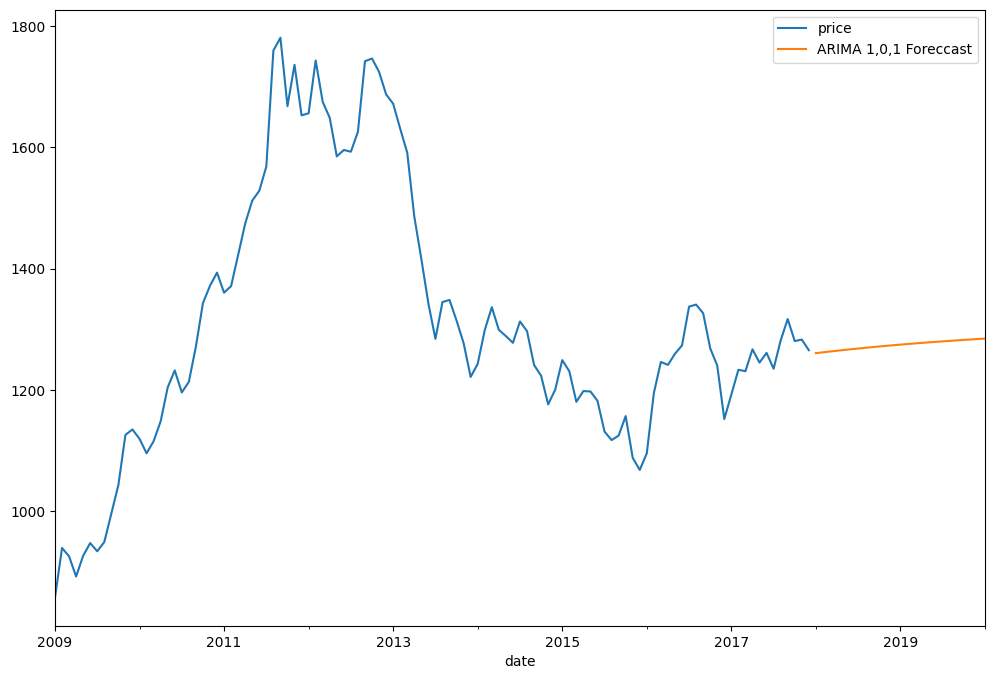

In [23]:
data['price'].plot(figsize = (12, 8), legend = True)
fcast.plot(legend=True)